---
title: " Amazon Analysis"
author:
  - Denyse BAYINGANA
  - Solange DUSABEMARIYA
format:
  revealjs:
    fig-width: 8
    fig-height: 4
    theme: solarized
    slide-number: true
    toc: false
    code-fold: True
    fig-align: center
    code-summary: "View Code"
execute:
  eval: true
  echo: true
  warning: false
  message: false
---

## Amazon Product Dataset – Exploratory and Descriptive Analysis
In this notebook, we conduct a comprehensive exploratory and descriptive analysis of the Amazon Product Dataset, which includes product information, pricing, customer reviews, categories, and other attributes relevant for e-commerce analytics.

This analytical phase is crucial for identifying patterns, detecting anomalies, understanding product and customer behavior, and building a strong foundation for any subsequent modeling or business intelligence tasks. We explore the distribution of key numerical and categorical variables, examine relationships between product features and customer sentiment, and leverage visualizations to effectively communicate insights. Special attention is given to variations in pricing across categories, sentiment trends in customer reviews, and the distribution of products within the dataset. These findings can inform strategic decisions such as product positioning, pricing strategies, and customer satisfaction improvements.

We begin our analysis by importing essential Python libraries for data processing, numerical analysis, and visualization:

- **pandas:** For managing, filtering, and aggregating structured tabular data, forming the core of our analysis workflow.

- **numpy:** For efficient numerical computations and array-based processing.

- **os:** To interact with the file system, allowing flexible path handling for input and output operations.

- **plotly.express:** A powerful visualization library used to create interactive and informative charts that help reveal patterns and support data-driven conclusions throughout the notebook.

In [1]:
import os
import pandas as pd
import numpy as np

## Loading the Cleaned Dataset
We load the cleaned version of the Amazon Dataset from the processed data directory into a Pandas DataFrame. The head(10) function shows the first ten records, giving a glimpse into the data columns such as product_id, product_name, category, etc.

In [2]:
Amazon=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DEMO5\Dataset\Amazon Cleaned Dataset.csv")
Amazon.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,ProductName,short_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1 099,0.0064,4.2,0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona Nylon,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,0.0043,4.0,0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Ambrane Unbreakable,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1 899,0.0090,3.9,0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Sounce Fast,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,0.0053,4.2,0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Boat Deuce,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,0.0061,4.2,0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Portronics Konnect,Computers&Accessories
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149,1 000,0.0085,3.9,0,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...,Ptron Solero,Computers&Accessories
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,17 663,499,0.0065,4.1,0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev.


## Top 15 Products by Average Discounted Price
This visualization highlights the top 15 Amazon products with the highest average discounted prices. The discounted_price values are first cleaned by removing non-numeric characters and converting them to numeric format. The data is then grouped by ProductName, and the mean of the cleaned discounted prices is calculated.

The bar chart provides insight into which products are sold at higher price points after discounting, helping identify premium items or brands in the dataset. This can be useful for understanding pricing strategies or targeting high-value products in further analysis.

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_21804\3844146564.py:2: SyntaxWarning: invalid escape sequence '\d'
  Amazon['discounted_price_clean'] = Amazon['discounted_price'].replace('[^\d.]', '', regex=True).astype(float)


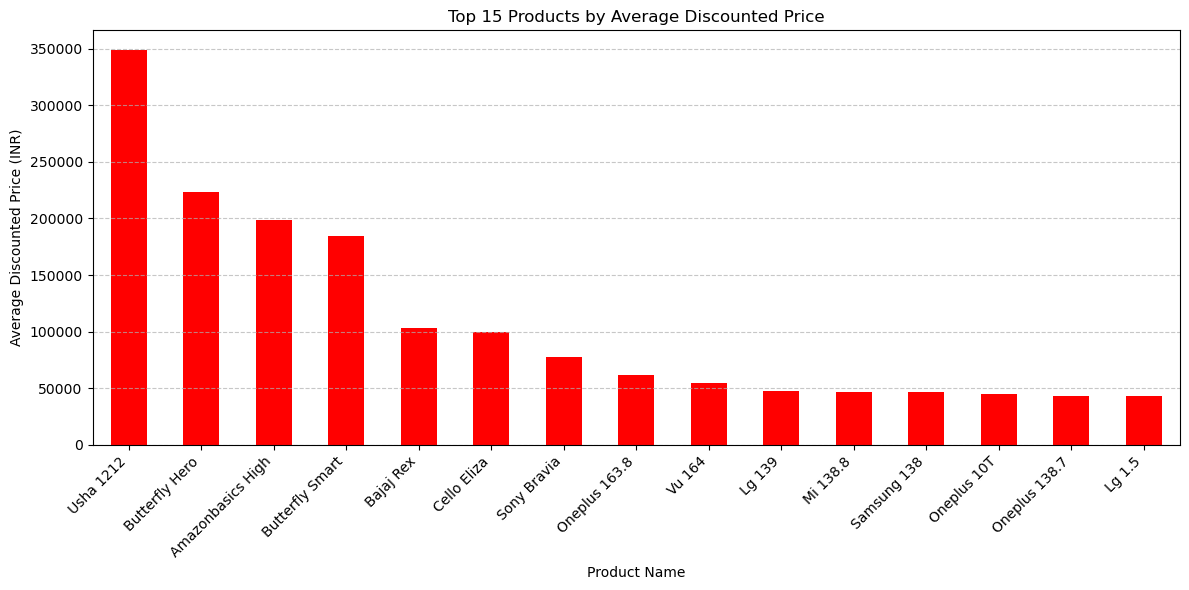

In [3]:
# Clean the 'discounted_price' column by removing non-numeric characters and converting to float
Amazon['discounted_price_clean'] = Amazon['discounted_price'].replace('[^\d.]', '', regex=True).astype(float)

# Group by 'ProductName' and calculate average discounted price
grouped_df = Amazon.groupby('ProductName')['discounted_price_clean'].mean().sort_values(ascending=False).head(15)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', color='Red')
plt.title('Top 15 Products by Average Discounted Price')
plt.xlabel('Product Name')
plt.ylabel('Average Discounted Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Recommendations 

- Promote products at discounted prices to appeal to more buyers.
- Compare these prices with competitor listings. If they're too high, consider reviewing the pricing strategy.
- Increase visibility of these products in advert, especially during sales campaigns.


## Sentiment Analysis of Customer Reviews for Top 15 Amazon Products

This code analyzes customer review sentiment for Amazon products by first defining lists of common positive and negative keywords. It processes the review text by converting all content to lowercase for consistent keyword matching. Each review is then flagged as either positive or negative depending on whether it contains any of the predefined keywords. The code groups the data by product name and counts how many positive and negative reviews each product has received. The result is a summary table showing these counts for the top 15 products with the highest number of positive reviews. Finally, a stacked bar chart is generated to visually compare the distribution of positive and negative feedback for each of these products, offering insights into customer satisfaction levels and potential product performance.

                     is_positive  is_negative
ProductName                                  
Amazon Basics                 20            7
Portronics Konnect            19            5
Samsung Galaxy                19           12
Noise Colorfit                15            3
Gizga Essentials              14            3
Ambrane Unbreakable           11            9
Boult Audio                   11            6
Ptron Solero                  11            0
Amazonbasics Usb              11            3
Boat Bassheads                10            4
Redmi Note                    10           10
Wayona Nylon                  10            0
Fire-Boltt Ninja              10            6
Boat Wave                      9            5
Sandisk Ultra                  9            3


<Figure size 1200x600 with 0 Axes>

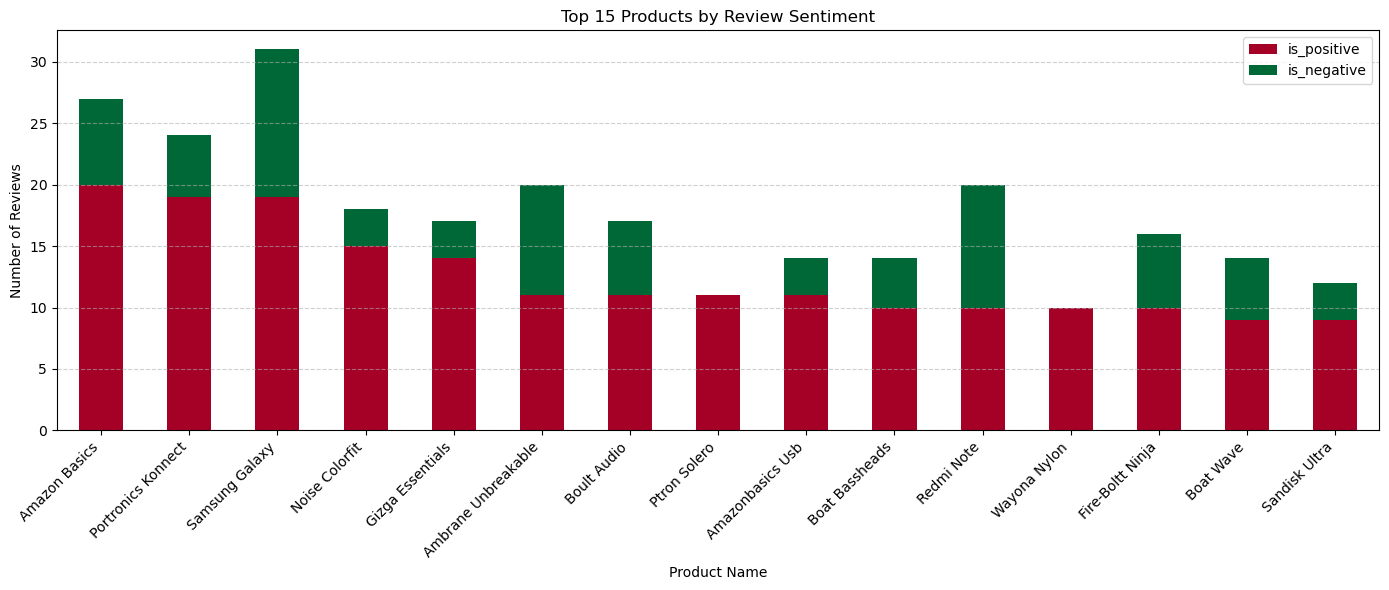

In [4]:
# Define basic positive and negative keywords
positive_keywords = ['good', 'excellent', 'great', 'amazing', 'nice', 'perfect', 'satisfied']
negative_keywords = ['bad', 'poor', 'worst', 'terrible', 'disappointed', 'not good']

# Lowercase all reviews for matching
Amazon['review_content_clean'] = Amazon['review_content'].astype(str).str.lower()

# Create sentiment flags
Amazon['is_positive'] = Amazon['review_content_clean'].apply(lambda x: any(word in x for word in positive_keywords))
Amazon['is_negative'] = Amazon['review_content_clean'].apply(lambda x: any(word in x for word in negative_keywords))

# Group and count sentiment by ProductName
sentiment_summary = Amazon.groupby('ProductName')[['is_positive', 'is_negative']].sum().sort_values(by='is_positive', ascending=False).head(15)
print(sentiment_summary)


plt.figure(figsize=(12, 6))
sentiment_summary[['is_positive', 'is_negative']].plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(14,6))
plt.title('Top 15 Products by Review Sentiment')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Recommendations

- Products with a high number of positive reviews,Highlight these products in marketing campaigns.
- Use positive review quotes as social proof in advert or product descriptions.
- Read full negative reviews to understand pain points (e.g., quality, delivery delays) and try to collect it.
- Encourage customer feedback follow-up via email.

## Distribution of Products Across Categories

This code analyzes the distribution of Amazon products across different categories by counting how many products fall under each category using the short_category column. It calculates the frequency of each category and then visualizes the results using a bar chart. The chart displays the number of products on the y-axis and the corresponding categories on the x-axis, allowing for a clear comparison of product counts across different categories. This visualization helps identify which product categories are most or least represented in the dataset, providing insights into category-level inventory or listing trends.

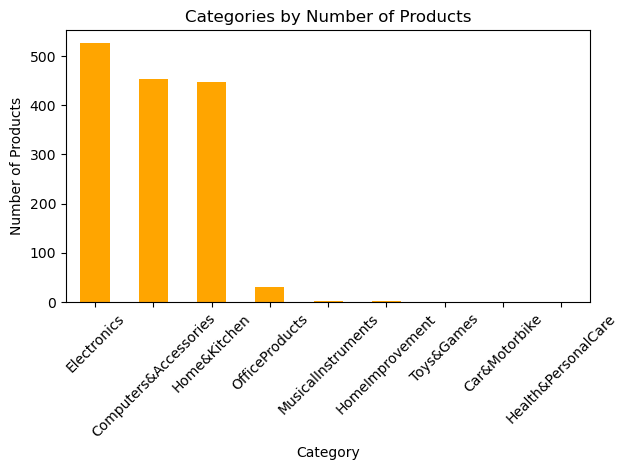

In [5]:
# Count number of products per category
category_counts = Amazon['short_category'].value_counts()

# Plot the bar chart
plt.plot(figsize=(10, 6))
category_counts.plot(kind='bar', color='orange')
plt.title('Categories by Number of Products')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Recommendations
- Prioritize these dominant categories for targeted marketing, promotions, and inventory optimization.
- Ensure these top categories have detailed filters and smooth navigation on e-commerce platforms.
- Do market research: Are people searching for these categories but finding too few products?
- Either expand the product line in these categories or remove them to reduce clutter.

## Average Customer Rating per Product Category

This code evaluates the average customer rating for products within each category by grouping the dataset by the short_category field and calculating the mean rating for each group. The resulting average ratings are sorted in descending order to highlight the top-rated categories. A bar chart is then used to visualize this information, where each bar represents a category, and its height indicates the average rating. Value labels are displayed on top of each bar to clearly show the numerical average. The chart is further customized for clarity by removing the y-axis label and ticks, allowing the viewer to focus on the relative performance of product categories based on customer feedback.

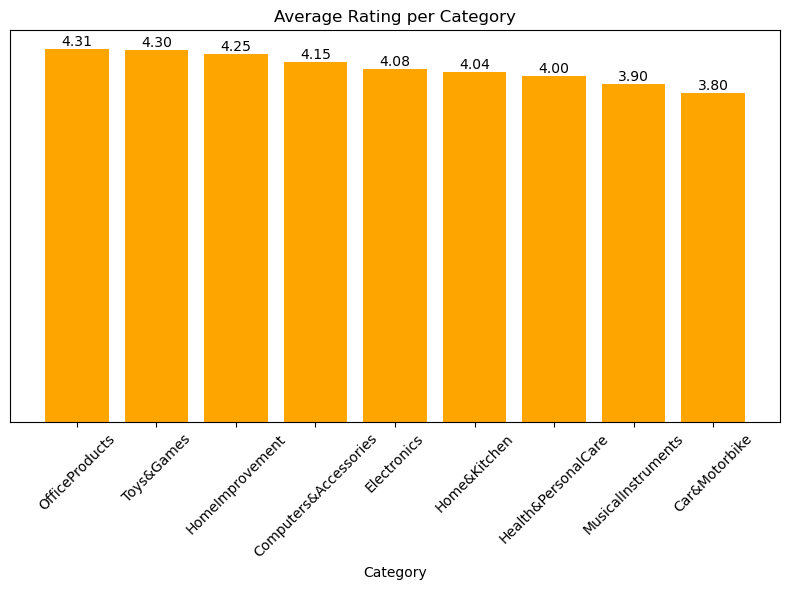

In [6]:
# Group by category and calculate average rating
avg_rating = Amazon.groupby('short_category')['rating'].mean().sort_values(ascending=False)
# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_rating.index, avg_rating.values, color='orange')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

# Customize the chart
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('')  # Remove Y-axis label
plt.yticks([])  # Remove Y-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Recommendation

- Check if the low ratings are due to quality issues, shipping delays, or misleading descriptions.

- Read user reviews to identify the common complaints.

- Consider replacing poor-quality items or improving the listing content.

## Average Actual vs Discounted Price per Product Category

This code compares the average actual and discounted prices of Amazon products across different categories. It begins by cleaning the actual_price and discounted_price columns, removing non-numeric characters like commas and spaces to ensure accurate numerical conversion. These cleaned values are then converted to float data types for calculation. The data is grouped by short_category, and the mean of both actual and discounted prices is computed for each category. A grouped bar chart is plotted to visualize the price comparison, with each category displaying two bars: one for the average actual price and another for the average discounted price. This visualization provides insights into pricing strategies and discount patterns across product categories.

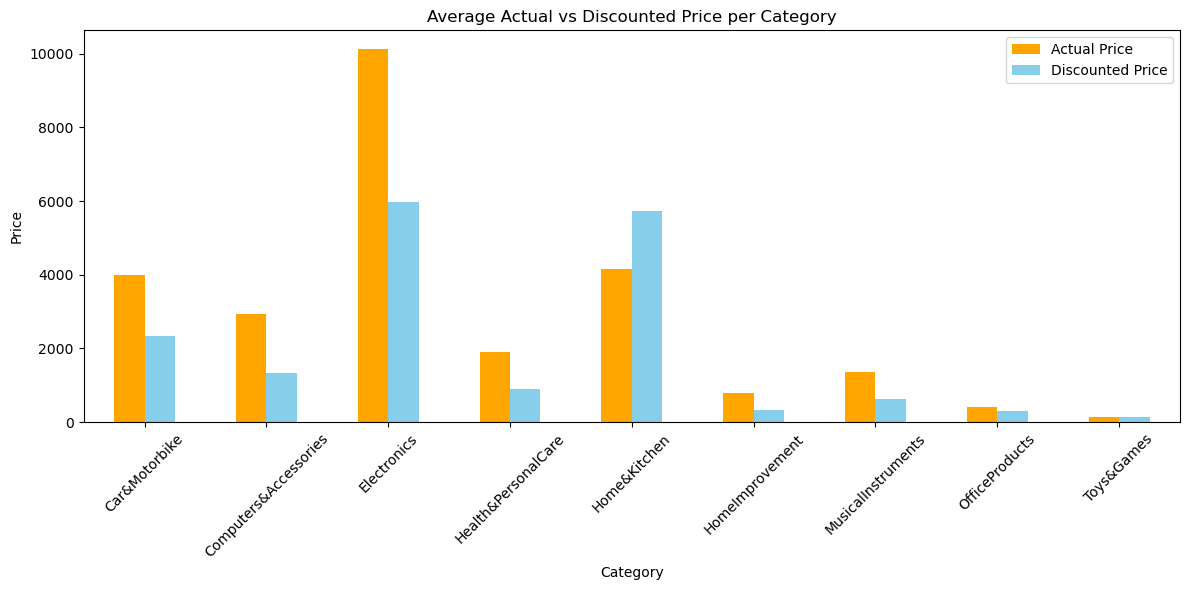

In [7]:
# Remove non-numeric characters like spaces or commas
Amazon['actual_price'] = Amazon['actual_price'].str.replace(',', '').str.replace(' ', '')
Amazon['discounted_price'] = Amazon['discounted_price'].str.replace(',', '').str.replace(' ', '')

# Convert to float
Amazon['actual_price'] = pd.to_numeric(Amazon['actual_price'], errors='coerce')
Amazon['discounted_price'] = pd.to_numeric(Amazon['discounted_price'], errors='coerce')

price_comparison = Amazon.groupby('short_category')[['actual_price', 'discounted_price']].mean()

# Plot
price_comparison.plot(kind='bar', figsize=(12, 6), color=['orange', 'skyblue'])
plt.title('Average Actual vs Discounted Price per Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Actual Price', 'Discounted Price'])
plt.tight_layout()
plt.show()


## Recommendation

## Focus on Categories with Big Discounts

- If some categories (like electronics or appliances) have a big difference between actual and discounted price:
- Promote them more customers love good deals.
- Use them in advrt or banners to attract buyers.
- You can also bundle with smaller items to increase sales.

## Watch Categories with Small or No Discount

- These products might be selling well without a discount Or maybe they are essentials (e.g., chargers, cables), and people buy them anyway.